In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)  # Default plot size

import os
os.getcwd()

%cd /g/data/p66/ars599/work_pmm/TNA_exp


/g/data/p66/ars599/work_pmm/TNA_exp


In [2]:
def calculate_n3_anom(var, ystart, ylast):
    ystart_str = str(ystart).zfill(4)
    ylast_str = str(ylast).zfill(4)
    var = var.sel(time=slice(ystart_str, ylast_str))
    var_clim = var.groupby("time.month").mean(dim="time")
    var_anom = var.groupby("time.month") - var_clim
    return var_anom, var_clim

def calculate_n3toref_anom(var, var_clim,  ystart, ylast):
    ystart_str = str(ystart).zfill(4)
    ylast_str = str(ylast).zfill(4)
    var = var.sel(time=slice(ystart_str, ylast_str))
    var_anom = var.groupby("time.month") - var_clim
    return var_anom

def detrend_numpy(data):
    time = np.arange(len(data))
    trend = np.polyfit(time, data, 1)
    linear_trend = np.polyval(trend, time)
    detrended_data = data - linear_trend
    return detrended_data

def quick_quiver(u, v, T1, T2, sampling_x=10, sampling_y=10, mag_max=None, **kwargs):
    x = u.lon - 180
    y = u.lat
    slx = slice(None, None, sampling_x)
    sly = slice(None, None, sampling_y)
    sl2d = (sly, slx)

    fig, ax = plt.subplots(figsize=(16, 8), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

    # Plot T1 as a pcolormesh plot
    pcm = ax.pcolormesh(x, y, T1, vmax=mag_max, vmin=-1 * mag_max, cmap=shayne_cmap)

    # Plot T2 as contour lines
    levels = np.linspace(T2.min(), T2.max(), 20)
    cs = ax.contour(T2.lon - 180, T2.lat, T2, levels=levels, colors='green', linewidth=4)
    ax.clabel(cs, inline=1, fontsize=10)

    # Create quiver plot for u and v
    ax.quiver(x[slx], y[sly], u[sl2d], v[sl2d])

    # Add coastlines
    ax.coastlines(color='gray', linewidth=3)

    # Set latitude and longitude ticks
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

    # Set tick label font size
    ax.tick_params(axis='both', labelsize=12)

    # Add colorbar
    cbar = fig.colorbar(pcm, ax=ax, orientation='vertical', pad=0.1)
    cbar.set_label('T1 Colorbar Label')  # Change the label as needed

    return ax


import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the colors for the colormap
colors = [
    (0.0000000e+00, 0.0000000e+00, 1.0000000e+00),
    (1.0000000e-01, 1.0000000e-01, 1.0000000e+00),
    (2.0000000e-01, 2.0000000e-01, 1.0000000e+00),
    (3.0000000e-01, 3.0000000e-01, 1.0000000e+00),
    (4.0000000e-01, 4.0000000e-01, 1.0000000e+00),
    (5.0000000e-01, 5.0000000e-01, 1.0000000e+00),
    (6.0000000e-01, 6.0000000e-01, 1.0000000e+00),
    (7.0000000e-01, 7.0000000e-01, 1.0000000e+00),
    (8.0000000e-01, 8.0000000e-01, 1.0000000e+00),
    (9.0000000e-01, 9.0000000e-01, 1.0000000e+00),
    (1.0000000e+00, 1.0000000e+00, 1.0000000e+00),
    (1.0000000e+00, 9.0000000e-01, 9.0000000e-01),
    (1.0000000e+00, 8.0000000e-01, 8.0000000e-01),
    (1.0000000e+00, 7.0000000e-01, 7.0000000e-01),
    (1.0000000e+00, 6.0000000e-01, 6.0000000e-01),
    (1.0000000e+00, 5.0000000e-01, 5.0000000e-01),
    (1.0000000e+00, 4.0000000e-01, 4.0000000e-01),
    (1.0000000e+00, 3.0000000e-01, 3.0000000e-01),
    (1.0000000e+00, 2.0000000e-01, 2.0000000e-01),
    (1.0000000e+00, 1.0000000e-01, 1.0000000e-01),
    (1.0000000e+00, 0.0000000e+00, 0.0000000e+00)
]

# Create the colormap
shayne_cmap = LinearSegmentedColormap.from_list("shayne_cmap", colors)

# TWP

In [3]:

import xarray as xr
import os

# Define input file paths
idir = "/g/data/p66/ars599/CMIP6/APP_output/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/piControl/"
iCNL_files = [
    "r4i1p1f1/Amon/ts/gn/v20240121/ts_Amon_ACCESS-CM2_piControl_r4i1p1f1_gn_106101-107912.nc",
    "r4i1p1f1/Amon/psl/gn/v20240121/psl_Amon_ACCESS-CM2_piControl_r4i1p1f1_gn_106101-107912.nc",
    "r4i1p1f1/Amon/uas/gn/v20240121/uas_Amon_ACCESS-CM2_piControl_r4i1p1f1_gn_106101-107912.nc",
    "r4i1p1f1/Amon/vas/gn/v20240121/vas_Amon_ACCESS-CM2_piControl_r4i1p1f1_gn_106101-107912.nc",
]

iNPAC_files = [
    "r4i1p1f3/Amon/ts/gn/v20240124/ts_Amon_ACCESS-CM2_piControl_r4i1p1f3_gn_106101-107912.nc",
    "r4i1p1f3/Amon/psl/gn/v20240124/psl_Amon_ACCESS-CM2_piControl_r4i1p1f3_gn_106101-107912.nc",
    "r4i1p1f3/Amon/uas/gn/v20240124/uas_Amon_ACCESS-CM2_piControl_r4i1p1f3_gn_106101-107912.nc",
    "r4i1p1f3/Amon/vas/gn/v20240124/vas_Amon_ACCESS-CM2_piControl_r4i1p1f3_gn_106101-107912.nc",
]

#  this is for the clim_0.5C
itNPC_files = [
    "r4i1p1f22/Amon/ts/gn/v20240125/ts_Amon_ACCESS-CM2_piControl_r4i1p1f22_gn_106901-107012.nc",
    "r4i1p1f23/Amon/ts/gn/v20240125/ts_Amon_ACCESS-CM2_piControl_r4i1p1f23_gn_107501-107612.nc",
    "r4i1p1f24/Amon/ts/gn/v20240125/ts_Amon_ACCESS-CM2_piControl_r4i1p1f24_gn_107801-107912.nc",
]

ipNPC_files = [
    "r4i1p1f22/Amon/psl/gn/v20240125/psl_Amon_ACCESS-CM2_piControl_r4i1p1f22_gn_106901-107012.nc",
    "r4i1p1f23/Amon/psl/gn/v20240125/psl_Amon_ACCESS-CM2_piControl_r4i1p1f23_gn_107501-107612.nc",
    "r4i1p1f24/Amon/psl/gn/v20240125/psl_Amon_ACCESS-CM2_piControl_r4i1p1f24_gn_107801-107912.nc",
]

iuNPC_files = [
    "r4i1p1f22/Amon/uas/gn/v20240125/uas_Amon_ACCESS-CM2_piControl_r4i1p1f22_gn_106901-107012.nc",
    "r4i1p1f23/Amon/uas/gn/v20240125/uas_Amon_ACCESS-CM2_piControl_r4i1p1f23_gn_107501-107612.nc",
    "r4i1p1f24/Amon/uas/gn/v20240125/uas_Amon_ACCESS-CM2_piControl_r4i1p1f24_gn_107801-107912.nc",
]

ivNPC_files = [
    "r4i1p1f22/Amon/vas/gn/v20240125/vas_Amon_ACCESS-CM2_piControl_r4i1p1f22_gn_106901-107012.nc",
    "r4i1p1f23/Amon/vas/gn/v20240125/vas_Amon_ACCESS-CM2_piControl_r4i1p1f23_gn_107501-107612.nc",
    "r4i1p1f24/Amon/vas/gn/v20240125/vas_Amon_ACCESS-CM2_piControl_r4i1p1f24_gn_107801-107912.nc",
]


#  dc295 + 0.8C
itNP_files = [
    "r4i1p1f26/Amon/ts/gn/v20240127/ts_Amon_ACCESS-CM2_piControl_r4i1p1f26_gn_106801-106912.nc",
    "r4i1p1f27/Amon/ts/gn/v20240127/ts_Amon_ACCESS-CM2_piControl_r4i1p1f27_gn_107101-107212.nc",
    "r4i1p1f28/Amon/ts/gn/v20240127/ts_Amon_ACCESS-CM2_piControl_r4i1p1f28_gn_107401-107512.nc",
]

ipNP_files = [
    "r4i1p1f26/Amon/psl/gn/v20240127/psl_Amon_ACCESS-CM2_piControl_r4i1p1f26_gn_106801-106912.nc",
    "r4i1p1f27/Amon/psl/gn/v20240127/psl_Amon_ACCESS-CM2_piControl_r4i1p1f27_gn_107101-107212.nc",
    "r4i1p1f28/Amon/psl/gn/v20240127/psl_Amon_ACCESS-CM2_piControl_r4i1p1f28_gn_107401-107512.nc",
]

iuNP_files = [
    "r4i1p1f26/Amon/uas/gn/v20240127/uas_Amon_ACCESS-CM2_piControl_r4i1p1f26_gn_106801-106912.nc",
    "r4i1p1f27/Amon/uas/gn/v20240127/uas_Amon_ACCESS-CM2_piControl_r4i1p1f27_gn_107101-107212.nc",
    "r4i1p1f28/Amon/uas/gn/v20240127/uas_Amon_ACCESS-CM2_piControl_r4i1p1f28_gn_107401-107512.nc",
]

ivNP_files = [
    "r4i1p1f26/Amon/vas/gn/v20240127/vas_Amon_ACCESS-CM2_piControl_r4i1p1f26_gn_106801-106912.nc",
    "r4i1p1f27/Amon/vas/gn/v20240127/vas_Amon_ACCESS-CM2_piControl_r4i1p1f27_gn_107101-107212.nc",
    "r4i1p1f28/Amon/vas/gn/v20240127/vas_Amon_ACCESS-CM2_piControl_r4i1p1f28_gn_107401-107512.nc",
]

In [4]:
# Read data using xarray
ds_n34_CNL = [xr.open_dataset(os.path.join(idir, file)) for file in iCNL_files] # t,p,u,v
ds_n34_NPAC = [xr.open_dataset(os.path.join(idir, file)) for file in iNPAC_files]


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


In [5]:
tCNL = ds_n34_CNL[0].mean("time").ts
pCNL = ds_n34_CNL[1].mean("time").psl
uCNL = ds_n34_CNL[2].mean("time").uas
vCNL = ds_n34_CNL[3].mean("time").vas

tNPAC = ds_n34_NPAC[0].mean("time").ts
pNPAC = ds_n34_NPAC[1].mean("time").psl
uNPAC = ds_n34_NPAC[2].mean("time").uas
vNPAC = ds_n34_NPAC[3].mean("time").vas

In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [8]:
import os
# Read in the datasets
# Concatenate along the time dimension
# Calculate the mean over the concatenated dataset
ds_n34_tNPC = [xr.open_dataset(os.path.join(idir, file)) for file in itNPC_files]
ds_concatenated = xr.concat(ds_n34_tNPC, dim="time")
tNPC = ds_concatenated.mean("time").ts

ds_n34_pNPC = [xr.open_dataset(os.path.join(idir, file)) for file in ipNPC_files]
ds_concatenated = xr.concat(ds_n34_pNPC, dim="time")
pNPC = ds_concatenated.mean("time").psl

ds_n34_uNPC = [xr.open_dataset(os.path.join(idir, file)) for file in iuNPC_files]
ds_concatenated = xr.concat(ds_n34_uNPC, dim="time")
uNPC = ds_concatenated.mean("time").uas

ds_n34_vNPC = [xr.open_dataset(os.path.join(idir, file)) for file in ivNPC_files]
ds_concatenated = xr.concat(ds_n34_vNPC, dim="time")
vNPC = ds_concatenated.mean("time").vas

# CNTL + 0.8
ds_n34_tNP = [xr.open_dataset(os.path.join(idir, file)) for file in itNP_files]
ds_concatenated = xr.concat(ds_n34_tNP, dim="time")
tNP = ds_concatenated.mean("time").ts

ds_n34_pNP = [xr.open_dataset(os.path.join(idir, file)) for file in ipNP_files]
ds_concatenated = xr.concat(ds_n34_pNP, dim="time")
pNP = ds_concatenated.mean("time").psl

ds_n34_uNP = [xr.open_dataset(os.path.join(idir, file)) for file in iuNP_files]
ds_concatenated = xr.concat(ds_n34_uNP, dim="time")
uNP = ds_concatenated.mean("time").uas

ds_n34_vNP = [xr.open_dataset(os.path.join(idir, file)) for file in ivNP_files]
ds_concatenated = xr.concat(ds_n34_vNP, dim="time")
vNP = ds_concatenated.mean("time").vas




/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, cal

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


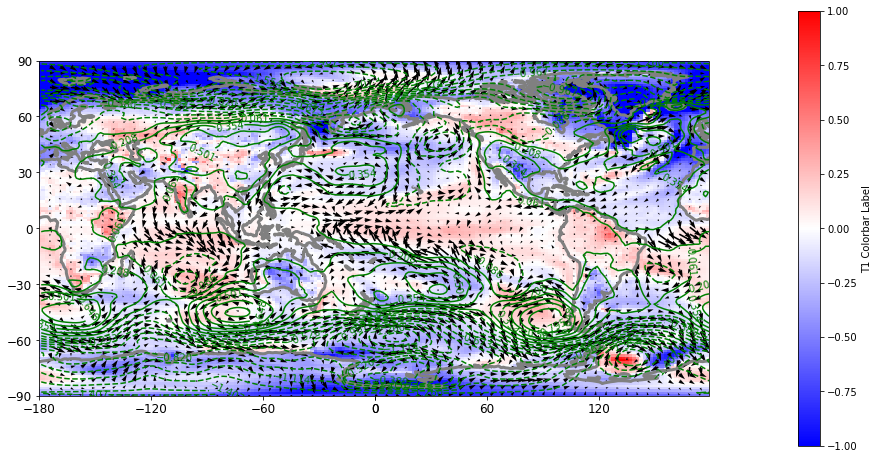

In [9]:
U = (uNPAC - uCNL)
V = (vNPAC - vCNL)
T = (tNPAC - tCNL)
P = (pNPAC - pCNL)/100

v_interp = V.interp(lat=U.lat, lon=U.lon)
V = v_interp

pcm1 = quick_quiver(U, V, T, P,
             mag_max=1, sampling_x=3, sampling_y=3, figsize=(16,8))

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


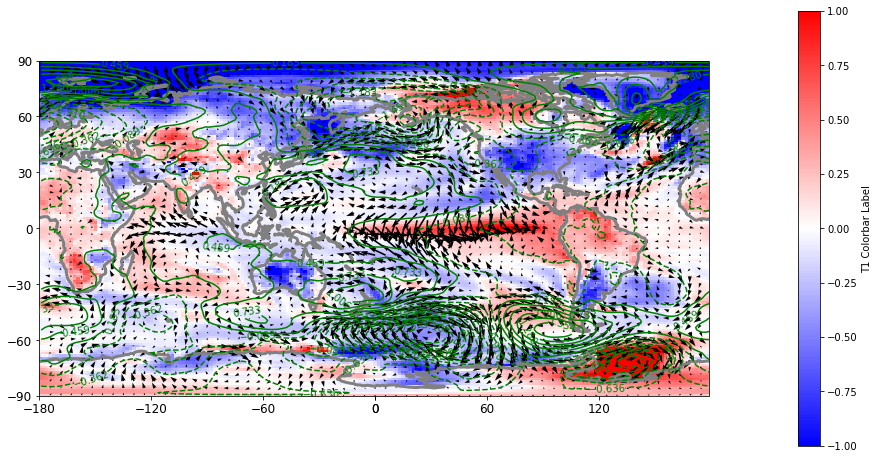

In [10]:
# diff_NPC_CNTL = (pNPC - pCNL)
# diff_NP_CNTL = (pNPAC - pCNL)

U = (uNPC - uCNL)
V = (vNPC - vCNL)
T = (tNPC - tCNL)
P = (pNPC - pCNL)/100

v_interp = V.interp(lat=U.lat, lon=U.lon)
V = v_interp

pcm1 = quick_quiver(U, V, T, P,
             mag_max=1, sampling_x=3, sampling_y=3, figsize=(16,8))

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


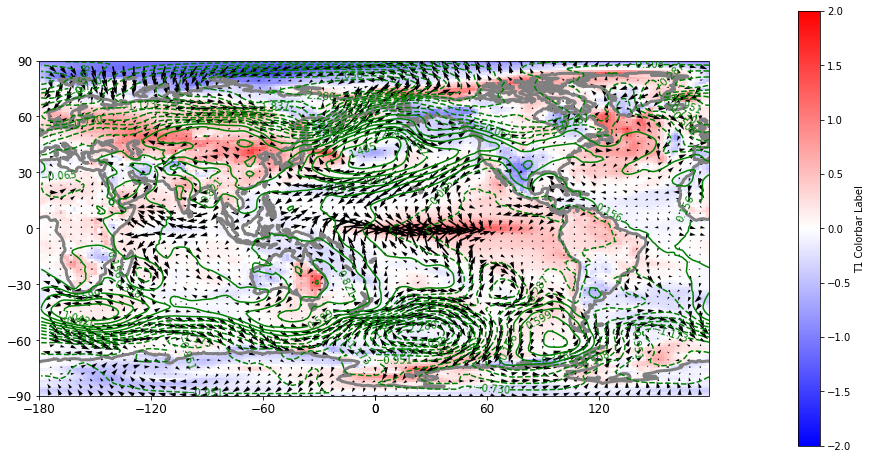

In [11]:
U = (uNP - uCNL)
V = (vNP - vCNL)
T = (tNP - tCNL)
P = (pNP - pCNL) / 100

v_interp = V.interp(lat=U.lat, lon=U.lon)
V = v_interp

pcm1 = quick_quiver(U, V, T, P, mag_max=2, sampling_x=3, sampling_y=3)



/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


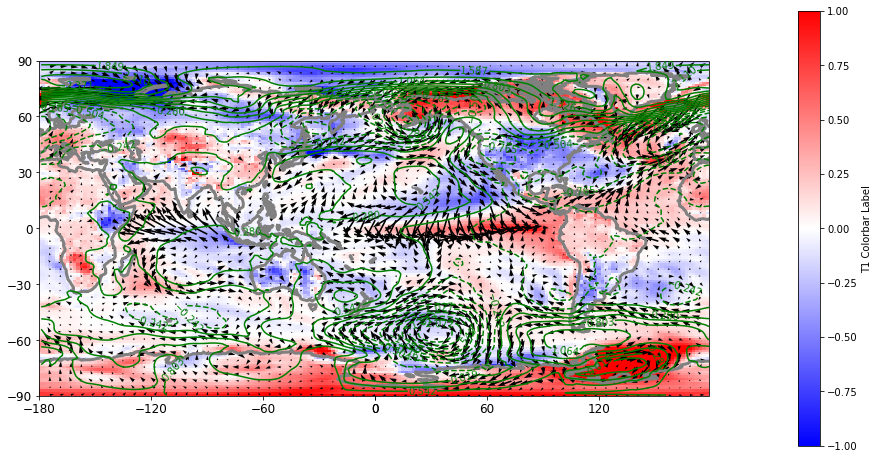

In [12]:
# diff_NPC_CNTL = (pNPC - pCNL)
# diff_NP_CNTL = (pNPAC - pCNL)

U = (uNPC - uNPAC)
V = (vNPC - vNPAC)
T = (tNPC - tNPAC)
P = (pNPC - pNPAC)/100

v_interp = V.interp(lat=U.lat, lon=U.lon)
V = v_interp

pcm1 = quick_quiver(U, V, T, P,
             mag_max=1, sampling_x=3, sampling_y=3, figsize=(16,8))